In [10]:
!pip install kaggle


In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"silpasadhukhan","key":"5397797fe203f427976248d5c72b4e09"}'}

In [16]:
!mkdir -p ~/.kaggle
!mv /path/to/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat '/path/to/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [17]:
!kaggle datasets list -s "titanic"


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [18]:
!mkdir -p /root/.kaggle


In [19]:
!cp kaggle.json /root/.kaggle/


In [20]:
!chmod 600 /root/.kaggle/kaggle.json


In [21]:
!kaggle datasets list -s "titanic"


ref                                  title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
heptapod/titanic                     Titanic                                             11090  2017-05-16 08:14:22.210000         129508       1726  0.7058824        
brendan45774/test-file               Titanic dataset                                     11514  2021-12-02 16:11:42.367000         198766       1569  1.0              
yasserh/titanic-dataset              Titanic Dataset                                     22564  2021-12-24 14:53:06.913000         212517        655  1.0              
azeembootwala/titanic                Titanic                                             12406  2017-06-05 12:14:37.477000          24562        201  0.8235294 

In [22]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 500MB/s]


In [23]:
!unzip house-prices-advanced-regression-techniques.zip -d house_prices


Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house_prices/data_description.txt  
  inflating: house_prices/sample_submission.csv  
  inflating: house_prices/test.csv   
  inflating: house_prices/train.csv  


📥 Downloading dataset...
📂 Extracting files...
Extraction successful.
📄 Loading training data...
🤖 Training Linear Regression model...
✅ Model Evaluation:
   RMSE: 52975.72
   R² Score: 0.63


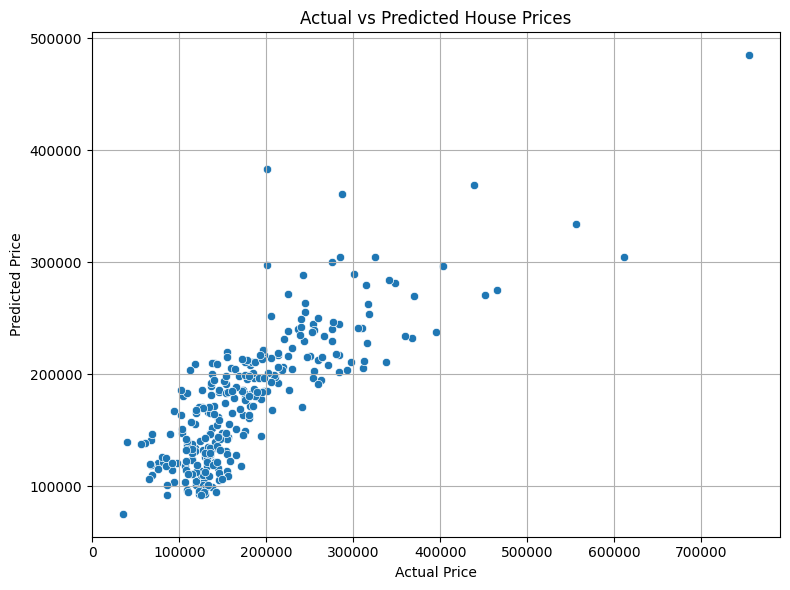

In [25]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download the dataset using Kaggle CLI
print("📥 Downloading dataset...")
# This command requires the Kaggle CLI to be installed and configured
# If it fails, you might need to install it: pip install kaggle
# And configure your API credentials: https://www.kaggle.com/docs/api
os.system('kaggle competitions download -c house-prices-advanced-regression-techniques')

# Define the expected zip file name
zip_file_name = 'house-prices-advanced-regression-techniques.zip'

# Step 2: Unzip the dataset
print("📂 Extracting files...")
if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall()
    print("Extraction successful.")
else:
    print(f"Error: {zip_file_name} not found. Please ensure the Kaggle download was successful.")


# Step 3: Load the training dataset
print("📄 Loading training data...")
# Check if the train.csv file exists before loading
if os.path.exists('train.csv'):
    df = pd.read_csv('train.csv')

    # Step 4: Select relevant features
    features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
    target = 'SalePrice'

    # Drop missing values (for simplicity)
    df = df[features + [target]].dropna()

    X = df[features]
    y = df[target]

    # Step 5: Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 6: Train the model
    print("🤖 Training Linear Regression model...")
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 7: Make predictions
    y_pred = model.predict(X_test)

    # Step 8: Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"✅ Model Evaluation:")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R² Score: {r2:.2f}")

    # Step 9: Plot actual vs predicted
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted House Prices")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: train.csv not found. Cannot proceed with training and evaluation.")

In [26]:
# Step 10: Load the test set
print("📄 Loading test data...")
test_file = 'test.csv'
if os.path.exists(test_file):
    test_df = pd.read_csv(test_file)
else:
    raise FileNotFoundError(f"{test_file} not found. Please ensure the test data exists.")

# Step 11: Extract the same features you used for training
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']

# Check if any of the required features are missing in test
missing_feats = [f for f in features if f not in test_df.columns]
if missing_feats:
    raise KeyError(f"Missing required feature(s) in test data: {missing_feats}")

X_test_for_pred = test_df[features]

# Handle missing values in test set (if any)
X_test_for_pred = X_test_for_pred.dropna()  # simple: drop rows with NA
# Or you can impute missing values: e.g.
# X_test_for_pred = X_test_for_pred.fillna(X_test_for_pred.mean())

# Step 12: Predict on test data
print("🔎 Predicting prices for test data...")
y_test_pred = model.predict(X_test_for_pred)

# Step 13: Prepare submission / output
# If you want to map predictions back to test IDs:
submission = pd.DataFrame({
    'Id': test_df.loc[X_test_for_pred.index, 'Id'],
    'SalePrice': y_test_pred
})

print("🎯 Sample of predictions:")
print(submission.head())

# Optionally: save to CSV
submission.to_csv('submission.csv', index=False)
print("Saved predictions to submission.csv")


📄 Loading test data...
🔎 Predicting prices for test data...
🎯 Sample of predictions:
     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106
Saved predictions to submission.csv
